<a href="https://colab.research.google.com/github/hulyacansiz/Assignments_Exercises/blob/master/SVM_Lab_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_pickle("saved_df.pkl")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128576,0.197441,-0.102231,-0.074675,-0.006435,-0.023073,0.561993,0.213164
Glucose,0.128576,1.000000,0.212010,0.055936,0.346205,0.231385,0.133567,0.255720,0.489618
BloodPressure,0.197441,0.212010,1.000000,0.030161,-0.049453,0.316929,-0.007358,0.326163,0.165914
SkinThickness,-0.102231,0.055936,0.030161,1.000000,0.435693,0.410868,0.177301,-0.150868,0.086409
Insulin,-0.074675,0.346205,-0.049453,0.435693,1.000000,0.197213,0.181174,-0.044994,0.151624
BMI,-0.006435,0.231385,0.316929,0.410868,0.197213,1.000000,0.157796,0.017854,0.294773
DiabetesPedigreeFunction,-0.023073,0.133567,-0.007358,0.177301,0.181174,0.157796,1.000000,0.026941,0.188072
Age,0.561993,0.255720,0.326163,-0.150868,-0.044994,0.017854,0.026941,1.000000,0.242064
Outcome,0.213164,0.489618,0.165914,0.086409,0.151624,0.294773,0.188072,0.242064,1.000000


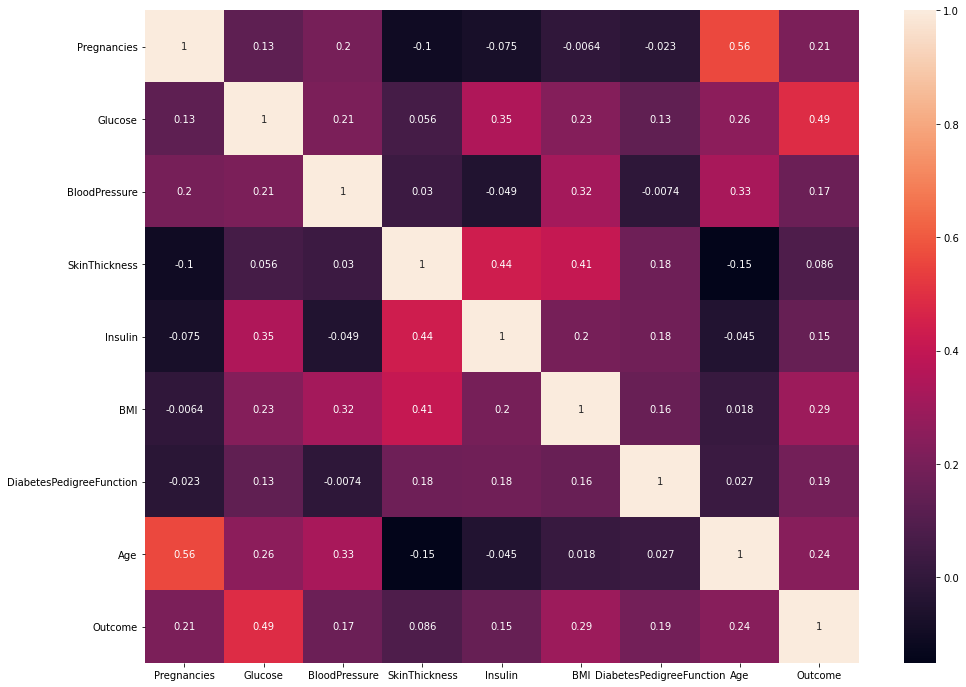

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.Outcome.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

In [ ]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, stratify=y, random_state=42)

**SVM**

In [ ]:
svm_model = SVC().fit(X_train, y_train)

In [ ]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[132,   9],
       [ 37,  35]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       141
           1       0.80      0.49      0.60        72

    accuracy                           0.78       213
   macro avg       0.79      0.71      0.73       213
weighted avg       0.79      0.78      0.77       213



**SVM (with scaled data)**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
svm_model = SVC().fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[124,  17],
       [ 26,  46]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       141
           1       0.73      0.64      0.68        72

    accuracy                           0.80       213
   macro avg       0.78      0.76      0.77       213
weighted avg       0.79      0.80      0.79       213



# Model tuning

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"kernel": ["linear","rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [ ]:
svm_cv_model.best_params_

{'kernel': 'rbf'}

# Try an other gridsearch

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"C": [0.1,0.5,1,10,20,50], "gamma":[1,0.1,0.01,0.001,0.0001]}

In [ ]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished


In [ ]:
svm_cv_model.best_params_

{'C': 1, 'gamma': 0.01}

In [ ]:
svm_tuned_2 = SVC(C = 1, gamma=0.01,kernel = 'linear').fit(X_train, y_train)

In [ ]:
y_pred = svm_tuned_2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[127,  14],
       [ 29,  43]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       141
           1       0.75      0.60      0.67        72

    accuracy                           0.80       213
   macro avg       0.78      0.75      0.76       213
weighted avg       0.79      0.80      0.79       213



# Third gridsearch

In [ ]:
svm = SVC(gamma="auto")

In [ ]:
svm_model = SVC().fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[124,  17],
       [ 26,  46]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       141
           1       0.73      0.64      0.68        72

    accuracy                           0.80       213
   macro avg       0.78      0.76      0.77       213
weighted avg       0.79      0.80      0.79       213

